In [130]:
# import sys
# !{sys.executable} -m pip install scipy

In [131]:
# !{sys.executable} -m pip install statsmodels 

In [132]:
# !{sys.executable} -m pip install bioinfokit 

In [11]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

from bioinfokit.analys import stat

from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#settings
pd.set_option('max_columns',1000)
pd.set_option('max_row',5000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
ewi = pd.read_excel('../data/EWI.xlsx')

In [14]:
ewoi = pd.read_excel('../data/EWOI.xlsx')

In [15]:
rwi = pd.read_excel('../data/RWI.xlsx')

In [16]:
rwoi = pd.read_excel('../data/RWOI.xlsx')

In [17]:
df_list = [ewi, ewoi, rwi, rwoi]

for df in df_list:
    df.drop(['提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '序号'], axis=1, inplace=True)

In [18]:
# merge 4 tables into one 
ewi['Type'] = 'ewi'
ewoi['Type'] = 'ewoi'
rwi['Type'] = 'rwi'
rwoi['Type'] = 'rwoi'

In [19]:
#'01 我经常看购物直播。', '02 我经常通过购物直播购买手机。', '03 我并不熟悉图中的主播。', '04 我非常熟悉图中的产品。',
#        '05 您认为以上的广告具有说服力吗？', '06 您认为以上的广告效果如何？', '07 您认为以上的广告是明智的还是愚蠢的？',
#        '08 假设您现在需要购买一部手机，看完以上模拟直播的动图，您有多大意愿购买该产品？'
col_list = ['01', '02', '03', '04', '05', '06', '07', '08', 'Gender', 'Age', 'Edu', 'Income', 'Total', 'Type']

for df in df_list:
    df.columns = col_list

In [20]:
temp1 = rwi.append(rwoi)
temp2 = ewi.append(ewoi)
df = temp1.append(temp2)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,01,02,03,04,05,06,07,08,Gender,Age,Edu,Income,Total,Type
0,2,1,5,2,4,5,4,2,1,1,6,1,25,rwi
1,3,3,5,3,4,4,4,1,1,1,6,3,27,rwi
2,2,1,5,1,1,2,1,1,2,1,6,2,14,rwi
3,4,4,3,3,4,3,3,3,1,1,5,1,27,rwi
4,3,3,3,3,4,2,3,2,2,1,6,1,23,rwi
5,1,1,5,1,5,4,4,1,1,1,6,1,22,rwi
6,2,1,5,1,1,1,1,1,1,1,6,1,13,rwi
7,2,1,5,2,4,4,3,1,2,1,6,1,22,rwi
8,1,1,5,5,1,1,1,1,1,1,6,4,16,rwi
9,2,2,5,2,2,1,2,2,2,2,6,2,18,rwi


In [21]:
rwi_list = list(df[df['Type']=='rwi']['Total'])
rwoi_list = list(df[df['Type']=='rwoi']['Total'])
ewi_list = list(df[df['Type']=='ewi']['Total'])
ewoi_list = list(df[df['Type']=='ewoi']['Total'])

In [22]:
temp1 = pd.DataFrame({'rwi':rwi_list,
                      'rwoi':rwoi_list})

temp2 = pd.DataFrame({'ewi':ewi_list,
                      'ewoi':ewoi_list})

temp_for_all = pd.DataFrame({'rwi':rwi_list,
                             'rwoi':rwoi_list,
                             'ewi':ewi_list,
                             'ewoi':ewoi_list})

In [24]:
temp3 = pd.DataFrame({'rwi': rwi_list,
                      'ewi': ewi_list})

temp4 = pd.DataFrame({'rwoi': rwoi_list,
                      'ewoi': ewoi_list})

In [25]:
fvalue, pvalue = stats.f_oneway(temp3['rwi'], temp3['ewi'])
print(fvalue, pvalue)

0.0003098125100154951 0.9860171770305713


In [26]:
fvalue, pvalue = stats.f_oneway(temp4['rwoi'], temp4['ewoi'])
print(fvalue, pvalue)

0.7415101877746704 0.39272351589768184


In [28]:
df_melt_4 = pd.melt(temp4.reset_index(), id_vars=['index'], value_vars=['rwoi', 'ewoi'])
df_melt_4.columns = ['index', 'treatments', 'value']
df_melt_4.head()

,index,treatments,value
0,0,rwoi,19
1,1,rwoi,20
2,2,rwoi,19
3,3,rwoi,20
4,4,rwoi,21


In [29]:
model = ols('value ~ C(treatments)', data=df_melt_4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),38.40000,1.00000,0.74151,0.39272
Residual,3003.60000,58.00000,nan,nan


In [32]:
res = stat()
res.tukey_hsd(df=df_melt_4, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,rwoi,ewoi,1.60000,-2.11933,5.31933,1.21779,0.39272


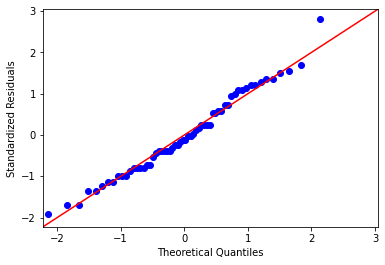

In [33]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

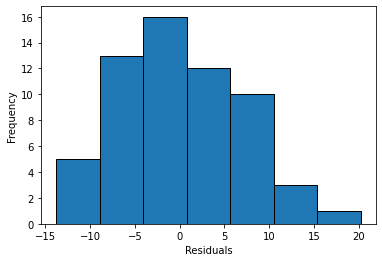

In [34]:
# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [23]:
temp_for_all

,rwi,rwoi,ewi,ewoi
0,25,19,13,22
1,27,20,29,29
2,14,19,16,13
3,27,20,19,20
4,23,21,21,17
5,22,12,38,8
6,13,30,17,28
7,22,13,10,19
8,16,16,32,13
9,18,12,23,18


In [112]:
temp_for_all.describe()

,rwi,rwoi,ewi,ewoi
count,30.00000,30.00000,30.00000,30.00000
mean,22.23333,21.80000,22.20000,20.20000
std,6.33917,7.50356,8.21017,6.87524
min,9.00000,8.00000,10.00000,8.00000
25%,17.00000,16.50000,17.25000,14.25000
50%,22.50000,20.00000,20.50000,20.50000
75%,27.00000,26.75000,26.25000,26.25000
max,33.00000,42.00000,48.00000,31.00000


In [123]:
df_melt = pd.melt(temp_for_all.reset_index(), id_vars=['index'], value_vars=['rwi', 'rwoi', 'ewi', 'ewoi'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt.head()

,index,treatments,value
0,0,rwi,25
1,1,rwi,27
2,2,rwi,14
3,3,rwi,27
4,4,rwi,23


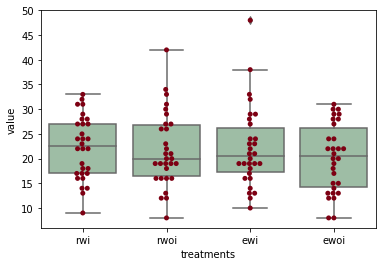

In [124]:
#boxplot
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [117]:
fvalue, pvalue = stats.f_oneway(temp_for_all['rwi'], temp_for_all['rwoi'], temp_for_all['ewi'], temp_for_all['ewoi'])
print(fvalue, pvalue)

0.5229733334059102 0.6673309654056059


In [126]:
# Ordinary Least Squares(OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),82.82500,3.00000,0.52297,0.66733
Residual,6123.76667,116.00000,nan,nan


In [129]:
# ANOVA TABLE using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.00000,82.82500,27.60833,0.52297,0.66733
Residual,116.00000,6123.76667,52.79109,nan,nan


till now the p value obtained from ANOVA analysis is > 0.05, and therefore, we conclude that there are not signigicant differeces among treatments.

We already have two hyps

- With emotional or without emitional
- With ralation or without ralation

In [167]:
# emotional
df_melt_e = pd.melt(temp2.reset_index(), id_vars=['index'], value_vars=['ewi', 'ewoi'])
df_melt_e.columns = ['index', 'treatments', 'value']

#df_melt_e

In [168]:
fvalue, pvalue = stats.f_oneway(temp2['ewi'], temp2['ewoi'])
print(fvalue, pvalue)

1.0464277122925185 0.3105790684623931


In [169]:
model1 = ols('value ~ C(treatments)', data=df_melt_e).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
anova_table1

,sum_sq,df,F,PR(>F)
C(treatments),60.00000,1.00000,1.04643,0.31058
Residual,3325.60000,58.00000,nan,nan


In [173]:
# The p value obtained from ANOVA analysis is significant (p<0.05), 
# and therefore, we conclude that there are signigicant differences among treatments.
# From ANOVA analysis, we know that treatment differences are statistically significant, 
# but ANOVA does not tell which treatments are significantly different from each other. 
# To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) 
# analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

# Alternatively, Scheffe’s method is completely coherent with ANOVA and considered as 
# more appropriate post hoc test for significant ANOVA for all unplanned comparisons. 
# However, it is highly conservative than other post hoc tests.



# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://reneshbedre.github.io/blog/howtoinstall.html
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt_e, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,ewi,ewoi,2.00000,-1.91362,5.91362,1.44667,0.31058


In [170]:
# ralation
df_melt_r = pd.melt(temp1.reset_index(), id_vars=['index'], value_vars=['rwi', 'rwoi'])
df_melt_r.columns = ['index', 'treatments', 'value']

#df_melt_r

In [171]:
fvalue, pvalue = stats.f_oneway(temp1['rwi'], temp1['rwoi'])
print(fvalue, pvalue)

0.05838346536422658 0.8099216717010993


In [172]:
model2 = ols('value ~ C(treatments)', data=df_melt_r).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(treatments),2.81667,1.00000,0.05838,0.80992
Residual,2798.16667,58.00000,nan,nan


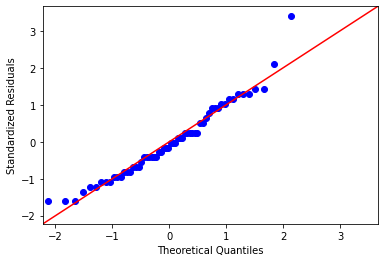

In [174]:
# Test ANOVA assumptions

# generate QQ-plot from standaridzed residuals
# QQ-PLOT
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

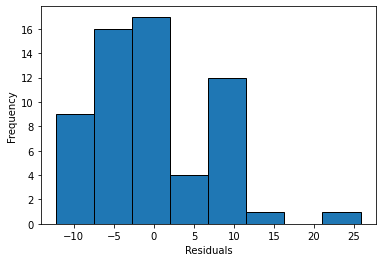

In [175]:
# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [176]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9582993388175964 0.038873862475156784


As the p value (0.0388) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.